In [1]:

from wid_tools import WIDDoughMaker
import pandas as pd
%matplotlib inline


# Goals:
 - Investigate what whiskey asset classes malt/grain/first-fill/refill/etc, distilleries, and ages of product are most ripe for investment and probable gain
 
# Tools:
The WIDDoughMaker fetches assets (aka pitches) and their respective price histories. Afterwards, exploratory data analysis via python

# Sample price chart
[Click me](https://www.whiskyinvestdirect.com/tullibardine/2015/Q4/BBF/chart.do)

In [2]:
p = WIDDoughMaker()
p.setUp()

# log in might not be necessary to fetch chart data, only to make bids
#p.login()
p.get_pitches()


Num of pitches:96


In [7]:
p.pitches().head()


,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId
0,HHR,Q4,2017,GRAIN,GBP,cameronbridge,SPIRIT000207
2,HHR,Q3,2017,GRAIN,GBP,cameronbridge,SPIRIT000196
4,HHR,Q4,2016,GRAIN,GBP,cameronbridge,SPIRIT000174
6,HHR,Q3,2015,GRAIN,GBP,cameronbridge,SPIRIT000156
8,HHR,Q4,2014,GRAIN,GBP,cameronbridge,SPIRIT000119


In [10]:
chart_df = pd.DataFrame()
failed_records = []

for r in p.pitches().iterrows():
    try:
        chart_df = pd.concat([p.get_chart_data(r[1].to_dict()),chart_df])
    except:
        failed_records.append(r[1].to_dict())

chart_df.head()


,day,dealDate,priceAvg,dummy,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId
0,65,2016-01-18,3.92,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
1,66,2016-01-19,3.90,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
2,67,2016-01-20,3.90,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
3,68,2016-01-21,3.91,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
4,69,2016-01-22,3.91,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130


In [178]:
#chart_df.to_csv('pitch_history_3_18_2018.csv',index=False)

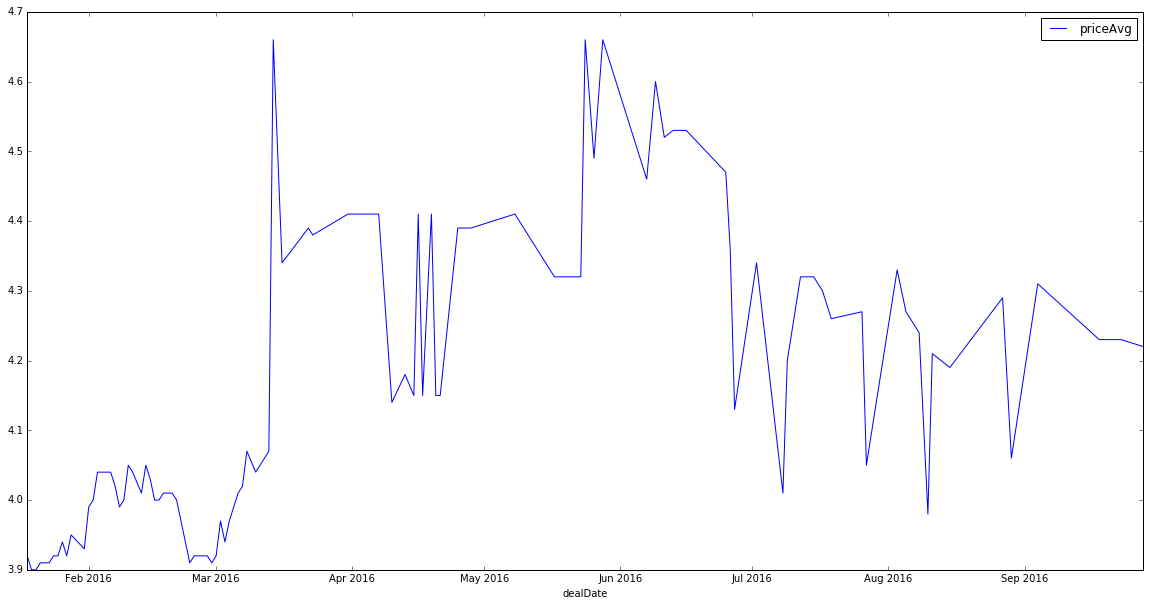

In [191]:
chart_df.head(100).plot(x='dealDate',y='priceAvg',figsize=(20,10))
plt.show()

In [194]:
chart_df.head(200)

,day,dealDate,priceAvg,dummy,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId
0,65,2016-01-18,3.92,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
1,66,2016-01-19,3.90,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
2,67,2016-01-20,3.90,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
3,68,2016-01-21,3.91,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
4,69,2016-01-22,3.91,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
5,70,2016-01-23,3.91,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
6,71,2016-01-24,3.92,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
7,72,2016-01-25,3.92,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
8,73,2016-01-26,3.94,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
9,74,2016-01-27,3.92,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
